# Домашнее задание №11. Метод опорных векторов

В этом задании вам необходимо поработать со следующим датасетом: https://archive.ics.uci.edu/dataset/45/heart+disease

Целевой столбец -- наличие или отсутствие сердечных заболеваний. Необходимо провести классификацию на два класса методом опорных векторов и вывести матрицу ошибок.

Данные необходимо обработать аналогично тому, как это делалось на семинаре. При подборе оптимальных параметров обучения необходимо использовать кросс-валидацию.

In [12]:
# !pip install ucimlrepo

In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Загрузка данных
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets

print(len(X))

303


In [3]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [4]:
y['num'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [5]:
y.replace({'num':{2:1, 3:1, 4:1}}, inplace = True)
y.head()

C:\Users\murza\AppData\Local\Temp\ipykernel_10880\4269297313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.replace({'num':{2:1, 3:1, 4:1}}, inplace = True)


,num
0,0
1,1
2,1
3,0
4,0


In [14]:
X_encoded = pd.get_dummies(X, columns=['sex',
                                       'cp',
                                       'trestbps',
                                       'chol',
                                       'fbs',
                                       'restecg',
                                       'thalach',
                                       'exang',
                                       'oldpeak',
                                       'slope',
                                       'ca',
                                       'thal'])
X_encoded.head()

,age,sex_0,sex_1,cp_1,cp_2,cp_3,cp_4,trestbps_94,trestbps_100,trestbps_101,...,slope_1,slope_2,slope_3,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63,False,True,True,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,True,False
1,67,False,True,False,False,False,True,False,False,False,...,False,True,False,False,False,False,True,True,False,False
2,67,False,True,False,False,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
3,37,False,True,False,False,True,False,False,False,False,...,False,False,True,True,False,False,False,True,False,False
4,41,True,False,False,True,False,False,False,False,False,...,True,False,False,True,False,False,False,True,False,False


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)
X_train_scaled = scale(X_train)  # Масштабирeю обучающие данные. Нормализацияы
X_test_scaled = scale(X_test)
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

[[ 0.36621253 -0.71647284  0.71647284 ... -1.10701861 -0.25637414
   1.28044324]
 [ 0.0319086   1.39572632 -1.39572632 ... -1.10701861 -0.25637414
   1.28044324]
 [-1.08243784  1.39572632 -1.39572632 ...  0.90332718 -0.25637414
  -0.78097956]
 ...
 [ 0.47764717 -0.71647284  0.71647284 ... -1.10701861 -0.25637414
   1.28044324]
 [ 0.70051646 -0.71647284  0.71647284 ... -1.10701861 -0.25637414
   1.28044324]
 [ 0.25477789  1.39572632 -1.39572632 ...  0.90332718 -0.25637414
  -0.78097956]]


c:\Users\murza\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=42)

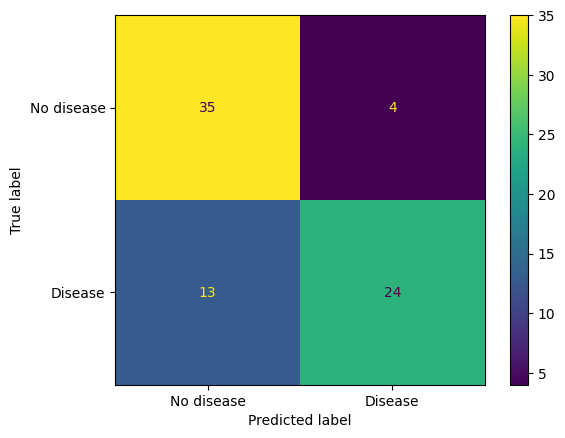

In [8]:
y_pred = clf_svm.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No disease", "Disease"])
disp.plot(values_format='d')

In [ ]:
param_grid = [
    {'C': [0.5, 1, 10, 100],
     'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
     'kernel': ['rbf']},
]
optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    verbose=0
)

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

c:\Users\murza\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


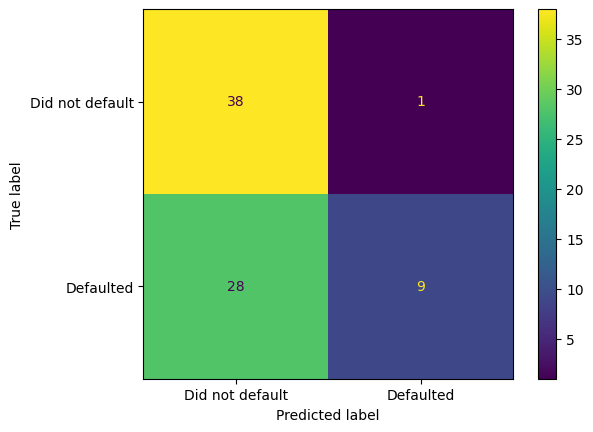

In [10]:
clf_svm = SVC(random_state=42, C=0.5, gamma=0.001)
clf_svm.fit(X_train_scaled, y_train)
y_pred = clf_svm.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Did not default", "Defaulted"])
disp.plot(values_format='d')